# Dealing With Missing values

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

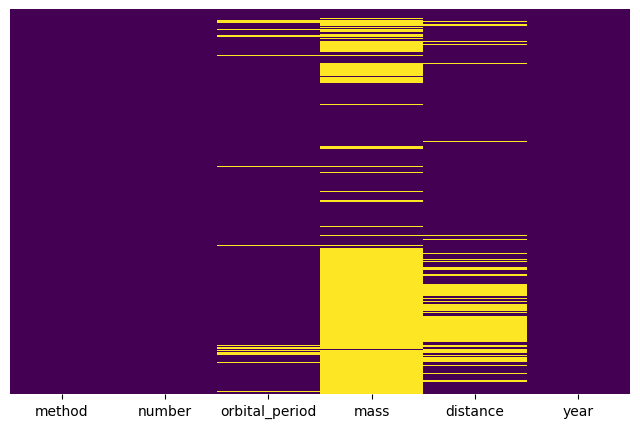

In [39]:
# Load dataset
data = sns.load_dataset('planets')
data.head()

# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull() ,cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [38]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [41]:
data.isnull().sum().sort_values(ascending=False)

mass              522
distance          227
orbital_period     43
method              0
number              0
year                0
dtype: int64

In [42]:
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)

mass              50.43
distance          21.93
orbital_period     4.15
method             0.00
number             0.00
year               0.00
dtype: float64

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
# load titanic dataset
data = sns.load_dataset('planets')

# calculate missing values
print("----------------------------------------")
print(f"Missing values in each column:\n{data.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(f"Percentage of missing values in each column:\n{round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
mass              522
distance          227
orbital_period     43
method              0
number              0
year                0
dtype: int64
----------------------------------------
Percentage of missing values in each column:
mass              50.43
distance          21.93
orbital_period     4.15
method             0.00
number             0.00
year               0.00
dtype: float64


In [46]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [50]:
round(data['orbital_period'].mean(),4)

2002.9176

In [51]:
data['orbital_period'].median()

39.9795

In [52]:
data['orbital_period'].fillna(data['orbital_period'].median(), inplace=True)

In [53]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [54]:
data['mass'].value_counts()

mass
1.900     6
1.800     6
2.300     5
2.600     5
2.700     4
         ..
3.366     1
10.350    1
0.624     1
0.683     1
1.540     1
Name: count, Length: 381, dtype: int64

In [57]:
data[['orbital_period', 'distance']].value_counts()


orbital_period  distance
39.979500       145.00      3
                140.00      2
                4080.00     2
0.090706        1200.00     1
395.800000      68.54       1
                           ..
13.290700       1400.00     1
13.367308       66.00       1
13.505000       23.44       1
13.839890       470.00      1
318280.000000   7.69        1
Name: count, Length: 804, dtype: int64

In [58]:
# replacing embarked missing values with mode
data['mass'] = data['mass'].fillna(data['mass'].median())
data['distance'] = data['distance'].fillna(data['distance'].median())

In [59]:
data.isnull().sum().sort_values(ascending=False)

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

# We can Also Impute Using Sk Learn

In [60]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer

In [61]:
df = sns.load_dataset('planets')

In [62]:
# impute age column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='mean')
df['mass'] = imputer.fit_transform(df[['mass']])

In [63]:
df.isnull().sum().sort_values(ascending=False)

distance          227
orbital_period     43
method              0
number              0
mass                0
year                0
dtype: int64

In [64]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Multivariate Impution

In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column using iterativeimputer from sklearn
imputer = IterativeImputer(max_iter=20, n_nearest_features=3)
df['mass'] = imputer.fit_transform(df[['mass']])

In [67]:
df.isnull().sum().sort_values(ascending=False)

distance          227
orbital_period     43
method              0
number              0
mass                0
year                0
dtype: int64

# ffill and backward fill

In [87]:
df = sns.load_dataset('planets')

In [93]:
# using forward fill impute age column
df['distance'] = df['distance'].bfill()

In [95]:
# Forward fill
df['mass'] = df['mass'].fillna(method='ffill')

# # Backward fill
# df['mass'] = df['mass'].fillna(method='bfill')

C:\Users\Ali BaBa\AppData\Local\Temp\ipykernel_12344\1746629866.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['mass'] = df['mass'].fillna(method='ffill')


In [96]:
df.isnull().sum().sort_values(ascending=False)

orbital_period    43
method             0
number             0
mass               0
distance           0
year               0
dtype: int64

# Using KNN Imputer

In [102]:
df = sns.load_dataset('planets')

In [100]:
from sklearn.impute import KNNImputer

# impute age column using KNNImputer from sklearn
imputer = KNNImputer(n_neighbors=5)
df['mass'] = imputer.fit_transform(df[['mass']])

In [104]:
# drop rows having missing values
df.dropna(inplace=True)

In [105]:
df.isnull().sum().sort_values(ascending=False)

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64